# Weather
***

This notebooks contains analysis completed with weather data sourced from [Climate Data](https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv). Here we explore and analyze temperature data, specifically by calculating and visualizing the daily and monthly mean temperatures. Additionally, we explore other variables such as wind speed and its rolling average. The data is cleaned and processed using Python's Pandas library, while visualizations are created using Matplotlib to help interpret the results.

## 1. Importing Modules

The script begins by importing necessary Python libraries [[6]](#6) [[7]](#7).

In [4]:
# Import modules

import pandas as pd

import matplotlib.pyplot as plt

## 2. Getting Data

The data is read directly from the URL using Pandas' read_csv function [[9]](#9). The **skiprows=22** argument skips the first 22 rows, which typically contain non-relevant information [[9]](#9).

Data link: https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv.

In [5]:
# Read in dataframe and skip

url = 'https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv'

df = pd.read_csv(url,skiprows=22)

/var/folders/rk/fh00kl713wq4442gfb60yzk40000gn/T/ipykernel_27656/2527280123.py:5: DtypeWarning: Columns (2,10,12,14,15,16,18,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(url,skiprows=22)


# 3. Inspecting the Data

The head() function is used to preview the first few rows, and info() provides a summary of the data, highlighting column types and non-null counts [[10]](#10) [[11]](#11). describe() is used to get statistical insights into the dataset, such as mean, median, and standard deviation of the variables [[46]](#46).

In [6]:
# Overview of the first rows of the dataset

df.head()

,date,ind,rain,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,...,ind.3,wdsp,ind.4,wddir,ww,w,sun,vis,clht,clamt
0,10-apr-1996 14:00,0,0.0,0,11.5,0,8.1,3.9,0.0,0,...,0,0,0,0,25,81,0.0,35000,32,5
1,31-jul-1996 08:00,0,0.0,0,11.5,0,11.1,10.7,0.0,0,...,0,0,0,0,25,82,0.0,40000,45,5
2,31-jul-1996 09:00,0,0.0,0,11.6,0,10.7,9.8,0.0,0,...,0,0,0,0,80,81,0.0,8000,32,7
3,31-jul-1996 10:00,0,0.0,0,12.9,0,11.3,9.8,0.0,0,...,0,0,0,0,25,82,0.0,28000,35,6
4,31-jul-1996 11:00,0,0.0,0,14.5,0,10.8,7.0,0.0,0,...,0,0,0,0,2,11,0.0,40000,40,6


In [7]:
# Confirming data type

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248394 entries, 0 to 248393
Data columns (total 21 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    248394 non-null  object 
 1   ind     248394 non-null  int64  
 2   rain    248394 non-null  object 
 3   ind.1   248394 non-null  int64  
 4   temp    248394 non-null  float64
 5   ind.2   248394 non-null  int64  
 6   wetb    248394 non-null  float64
 7   dewpt   248394 non-null  float64
 8   vappr   248394 non-null  float64
 9   rhum    248394 non-null  int64  
 10  msl     248394 non-null  object 
 11  ind.3   248394 non-null  int64  
 12  wdsp    248394 non-null  object 
 13  ind.4   248394 non-null  int64  
 14  wddir   248394 non-null  object 
 15  ww      248394 non-null  object 
 16  w       248394 non-null  object 
 17  sun     248394 non-null  float64
 18  vis     248394 non-null  object 
 19  clht    248394 non-null  object 
 20  clamt   248394 non-null  object 
dtypes: float64

In [8]:
# Getting some insight of the statistics of the variable data

df.describe()

,ind,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,ind.3,ind.4,sun
count,248394.000000,248394.000000,248394.000000,248394.000000,248394.000000,248394.000000,248394.000000,248394.000000,248394.000000,248394.000000,248394.000000
mean,0.469512,0.021067,8.762963,0.033491,7.811541,6.712935,10.207989,87.964403,2.001280,2.001320,0.126019
std,0.986484,0.143945,4.604485,0.228352,4.216243,4.378035,3.009784,12.124489,0.092767,0.094699,0.366059
min,0.000000,0.000000,-6.900000,0.000000,-7.300000,-11.400000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,5.400000,0.000000,4.700000,3.500000,7.800000,82.000000,2.000000,2.000000,0.000000
50%,0.000000,0.000000,8.800000,0.000000,8.000000,7.000000,10.000000,92.000000,2.000000,2.000000,0.000000
75%,0.000000,0.000000,12.000000,0.000000,11.000000,10.000000,12.200000,97.000000,2.000000,2.000000,0.000000
max,8.000000,2.000000,28.500000,6.000000,23.800000,22.500000,27.200000,100.000000,7.000000,7.000000,4.900000


## 4. Cleaning Data

The 'date' column is converted to a datetime type using pd.to_datetime(), allowing for easier manipulation and grouping based on date and time [[47]](#47).

In [9]:
# Confirm the data type in each column

df['date'] = pd.to_datetime(df['date'], format='%d-%b-%Y %H:%M')

df['date']

0        1996-04-10 14:00:00
1        1996-07-31 08:00:00
2        1996-07-31 09:00:00
3        1996-07-31 10:00:00
4        1996-07-31 11:00:00
                 ...        
248389   2024-11-30 20:00:00
248390   2024-11-30 21:00:00
248391   2024-11-30 22:00:00
248392   2024-11-30 23:00:00
248393   2024-12-01 00:00:00
Name: date, Length: 248394, dtype: datetime64[ns]

## 5. Plotting Temperature Data

### 5.1 Temperature Over Time

The temperature over time is plotted using plt.plot(), with the date on the x-axis and temperature on the y-axis [[37]](#37) [[48]](#48) [[39]](#39).

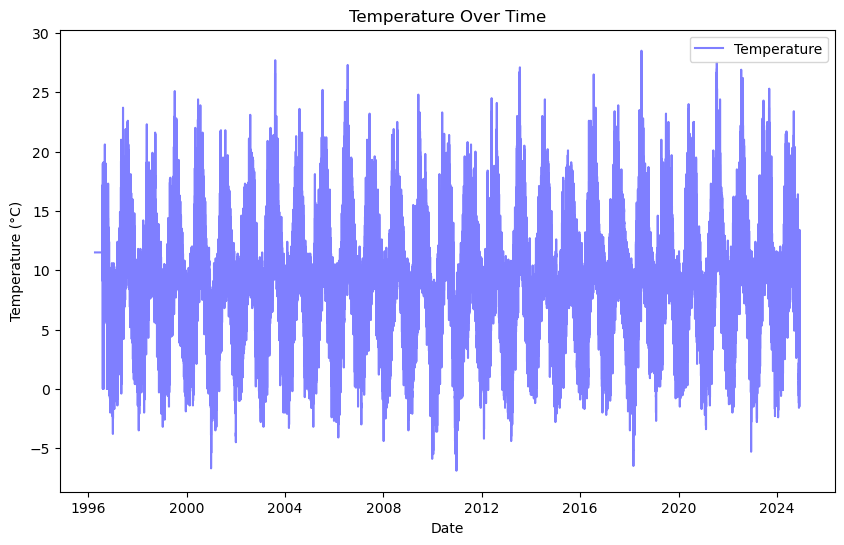

In [8]:
# Plotting the temperature timeline

plt.figure(figsize=(10, 6))
plt.plot(df['date'], df['temp'], color='blue', alpha=0.5, label='Temperature')
plt.title('Temperature Over Time')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.show()

### 5.2 Daily Mean Temperature

The mean temperature for each day is calculated by grouping the data by date and averaging the temperature [[49]](#49) [[50]](#50). This is then plotted to visualize the daily trends [[37]](#37) [[48]](#48) [[39]](#39).

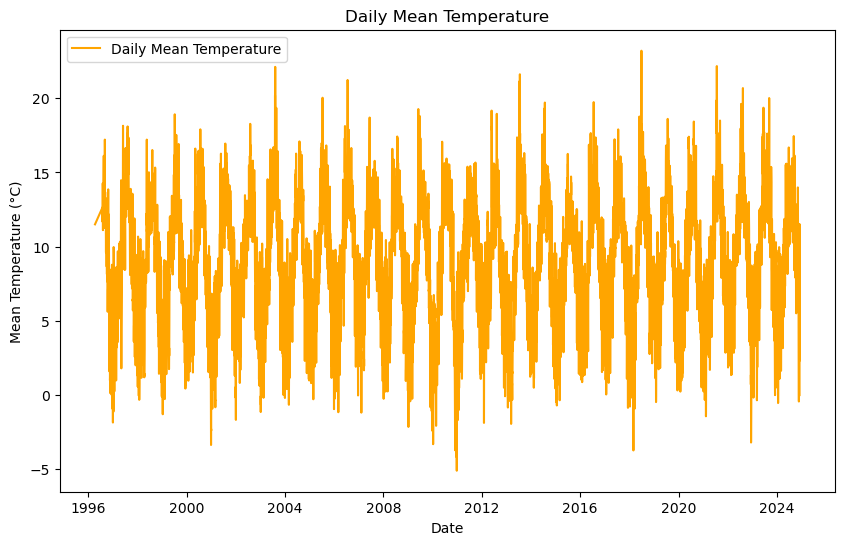

In [10]:
# Calculate the mean temperature each day

daily_mean_temp = df.groupby(df['date'].dt.date)['temp'].mean()

# Plot the mean temperature each day
plt.figure(figsize=(10, 6))
plt.plot(daily_mean_temp.index, daily_mean_temp.values, color='orange', label='Daily Mean Temperature')
plt.title('Daily Mean Temperature')
plt.xlabel('Date')
plt.ylabel('Mean Temperature (°C)')
plt.legend()
plt.show()

### 5.3 Monthly Mean Temperature

A **month_year** column is created to group the data by month and year [[51]](#51) [[45]](#45) [[52]](#52). The mean temperature for each month is calculated and visualized.

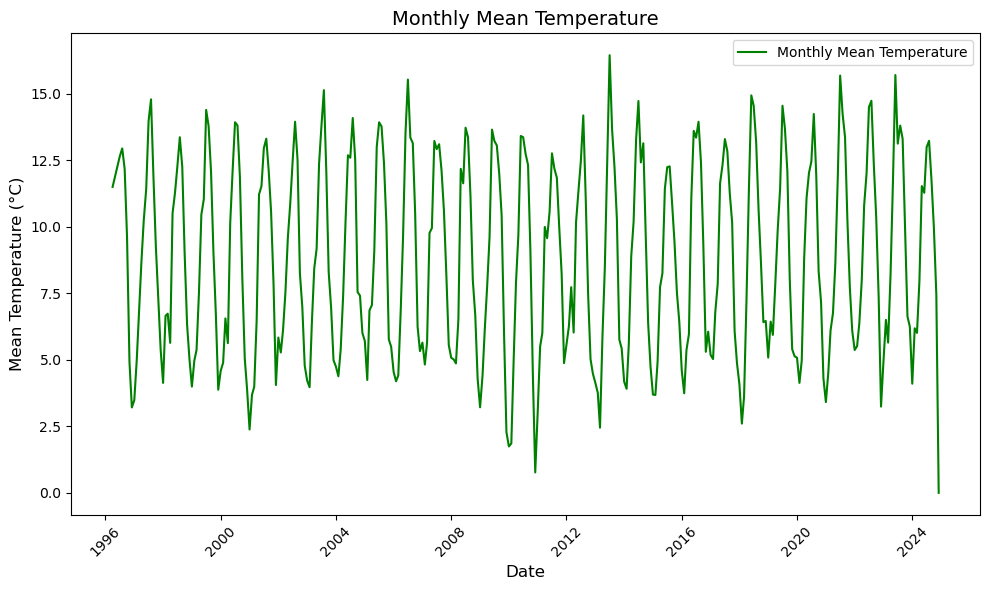

In [10]:
# Create a 'month_year' column as a string in the format 'Month-Year'
df['month_year'] = df['date'].dt.strftime('%b-%Y')

# Calculate the mean temperature each month
monthly_mean_temp = df.groupby('month_year')['temp'].mean()

# Ensure 'month_year' is a datetime type
monthly_mean_temp.index = pd.to_datetime(monthly_mean_temp.index, format='%b-%Y')

# Sort by date (if not already sorted)
monthly_mean_temp = monthly_mean_temp.sort_index()

# Plot the mean temperature for each month
plt.figure(figsize=(10, 6))
plt.plot(monthly_mean_temp.index, monthly_mean_temp.values, color='green', label='Monthly Mean Temperature')

# Improve x-axis formatting
plt.title('Monthly Mean Temperature', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Mean Temperature (°C)', fontsize=12)
plt.xticks(rotation=45)  # Rotate the x-axis labels
plt.legend()
plt.tight_layout()  # Ensure everything fits in the plot area
plt.show()

## 6. Wind Speed Analysis

### 6.1 Cleaning the Data: Handling Missing Data

This script verifies the null values in the column `wsdp` by checking for NaNs [[53]](#53).

In [33]:
# Count the occurrences of NaN in the 'wdsp' column
null_wdsp_count = df[df['wdsp'].isna()].shape[0]

# Print the result
print(f"Number of NaN values in 'wdsp': {null_wdsp_count}")

Number of NaN values in 'wdsp': 50


After dropping rows with missing wind speed values (wdsp), we then verify if the missing values were successfully removed by checking for NaNs in the column again.

In [34]:
# Drop rows where 'wdsp' is NaN
df = df.dropna(subset=['wdsp'])

# Verify if NaN values are removed
null_wdsp_count = df['wdsp'].isna().sum()
print(f"Number of NaN values in 'wdsp' after dropping: {null_wdsp_count}")


Number of NaN values in 'wdsp' after dropping: 0


### 6.2 Wind Speed Analysis

The `wdsp` values are plotted over time to observe how the wind speed changes.

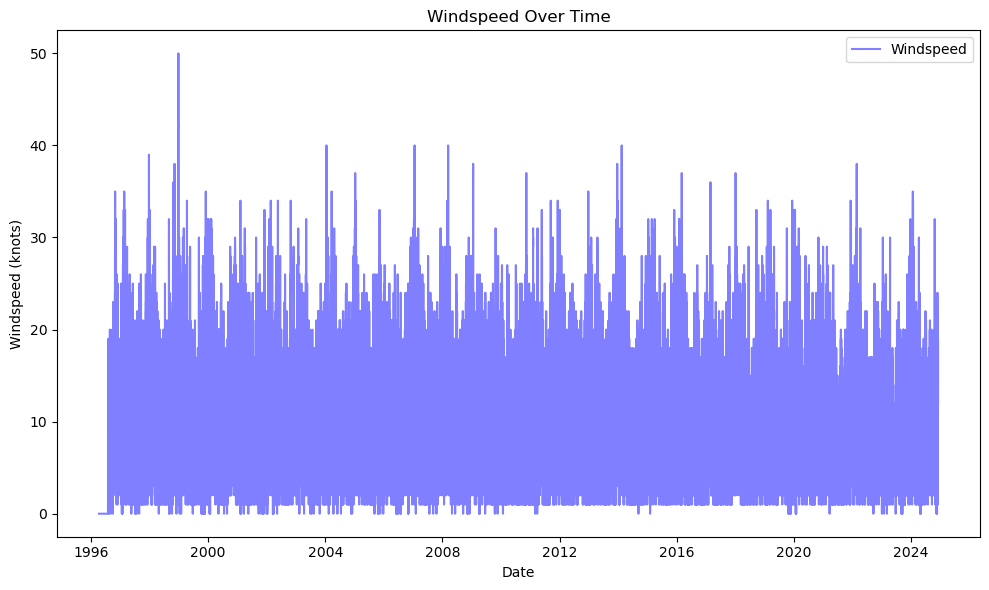

In [36]:

# Plot the Windspeed

plt.figure(figsize=(10, 6))
plt.plot(df['date'], df['wdsp'], color='blue', alpha=0.5, label='Windspeed')
plt.title('Windspeed Over Time')
plt.xlabel('Date')
plt.ylabel('Windspeed (knots)')
plt.legend()
plt.tight_layout()
plt.show()

### 6.3 Wind Speed Analysis using 24-hour window

A rolling mean of wind speed is calculated using a 24-hour window, which smooths out short-term fluctuations and shows long-term trends [[54]](#54).

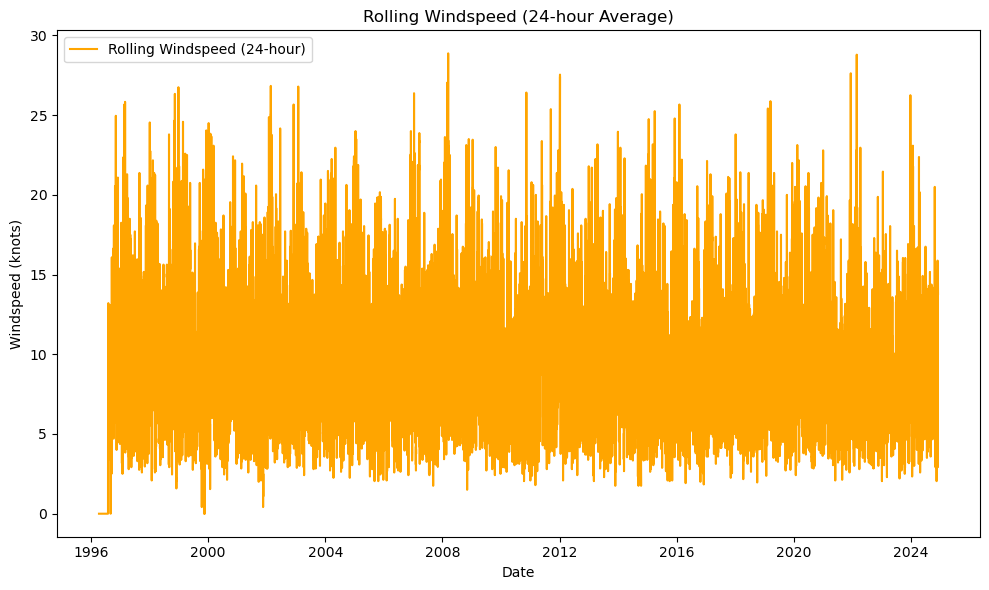

In [37]:
# Plot the Rolling Windspeed (24-hour)
df['rolling_wdsp'] = df['wdsp'].rolling(window=24, min_periods=1).mean()

plt.figure(figsize=(10, 6))
plt.plot(df['date'], df['rolling_wdsp'], color='orange', label='Rolling Windspeed (24-hour)')
plt.title('Rolling Windspeed (24-hour Average)')
plt.xlabel('Date')
plt.ylabel('Windspeed (knots)')
plt.legend()
plt.tight_layout()
plt.show()

### 6.4 Max Windspeed

The script calculates the maximum wind speed for each day and plots this data to analyze the highest wind speed recorded per day [[55]](#55).

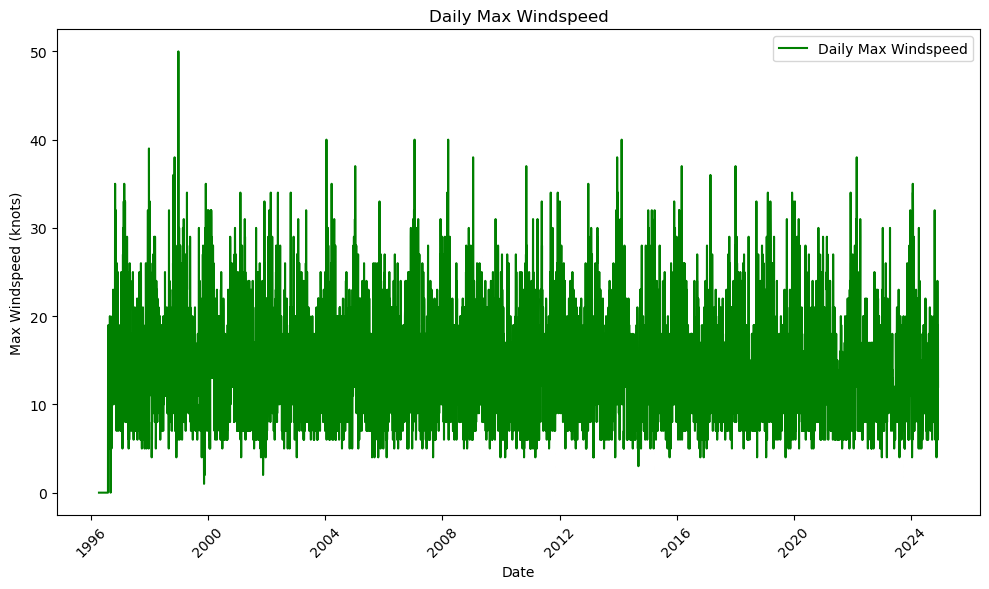

In [39]:
# Plot the Max Windspeed for Each Day

df['date_only'] = df['date'].dt.date
daily_max_wdsp = df.groupby('date_only')['wdsp'].max()

plt.figure(figsize=(10, 6))
plt.plot(daily_max_wdsp.index, daily_max_wdsp.values, color='green', label='Daily Max Windspeed')
plt.title('Daily Max Windspeed')
plt.xlabel('Date')
plt.ylabel('Max Windspeed (knots)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

## 6.5 Monthly Mean of Daily Max Windspeeds

This code calculates and plots the monthly mean of daily maximum wind speeds [[56]](#56). It groups the daily max windspeed data by month and year, computes the mean for each group, and visualizes it as a time series plot [[57]](#57).

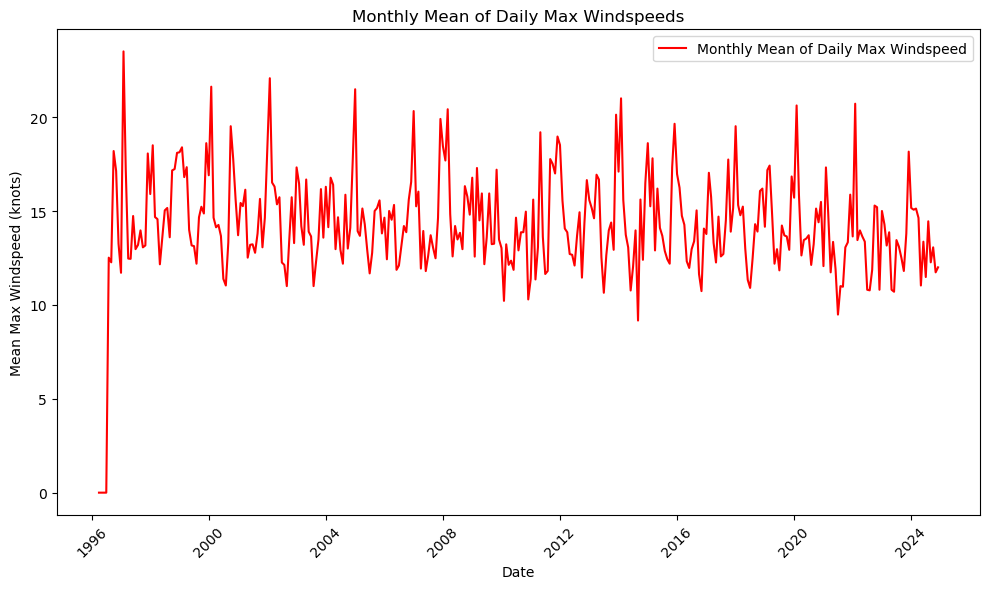

In [40]:
# 4. Plot the Monthly Mean of Daily Max Windspeeds

# Create a 'month_year' column
df['month_year'] = df['date'].dt.to_period('M')

# Group by month and calculate mean of daily max windspeed
monthly_mean_daily_max_wdsp = daily_max_wdsp.groupby(pd.to_datetime(daily_max_wdsp.index).to_period('M')).mean()

plt.figure(figsize=(10, 6))
plt.plot(monthly_mean_daily_max_wdsp.index.to_timestamp(), monthly_mean_daily_max_wdsp.values, color='red', label='Monthly Mean of Daily Max Windspeed')
plt.title('Monthly Mean of Daily Max Windspeeds')
plt.xlabel('Date')
plt.ylabel('Mean Max Windspeed (knots)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

## 7. Conclusion

In this notebook, we analyzed and visualized weather data sourced from Climate Data, focusing on key variables such as temperature and wind speed. The analysis began with data import and inspection to ensure proper structure and understanding. By leveraging Python's **Pandas** library, we efficiently cleaned and processed the data, enabling calculations of meaningful statistics, including **daily and monthly mean temperatures**. 

Visualizations using **Matplotlib** allowed us to uncover trends in temperature over time, illustrating daily variations and overall patterns. Furthermore, the inclusion of rolling averages for wind speed provided insight into short-term fluctuations, enhancing our understanding of the dataset.

This analysis highlights the power of Python for handling large datasets, performing data transformations, and creating intuitive visualizations. The process demonstrates a comprehensive approach to exploring climate-related data, which can serve as a foundation for further statistical analysis or predictive modeling in meteorology and environmental studies.

***
# End